**Penjelasan dari setiap variable dalam data;**

*   id = Nomor ID Pasien
*   gender = Jenis Kelamin
*   age = Usia
*   Hypertension = 0 jika pasien tidak mempunyai hipertensi, 1 jika pasien mempunyai hipertensi
*   heart_disease = 0 jika pasien tidak mempunyai penyakit jantung, 1 jika pasien mempunyai penyakit jantung
*   ever_married = Status perkawinan
*   work_type = Status pekerjaan
*   Residence_type = Tempat tinggal desa / kota
*   avg_glucose_level = Rata rata gula darah dalam tubuh
*  bmi = Berat badan
*  smoking_status = Status merokok
*   stroke = 1 jika pasien stroke, 0 jika pasien tidak stroke





# **Import Basic Libraries**

In [1]:
import pandas as pd
import numpy as np
import pycaret
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

# **Import Dataset**

In [2]:
df = pd.read_csv("C:\\Users\\dhiwa\\OneDrive\\Dokumen\\datanyawch\\dataset.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


# **Exploration**

### Check Data  Types

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


### Check Data Missing Values

In [4]:
missing_values = df.isna().sum()
print(missing_values)


id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64


## **Interpretasi :**

Diketahui bahwa terdapat missing value pada 2 variabel yaitu 'variabel bmi' dan 'smoking_status'

### Unique Value Analysis

In [5]:
print(df["gender"].unique())
print(df["ever_married"].unique())
print(df["work_type"].unique())
print(df["Residence_type"].unique())

['Male' 'Female' 'Other']
['No' 'Yes']
['children' 'Private' 'Never_worked' 'Self-employed' 'Govt_job']
['Rural' 'Urban']


### Check Imbalanced Data

In [6]:
df["stroke"].value_counts()

stroke
0    42617
1      783
Name: count, dtype: int64

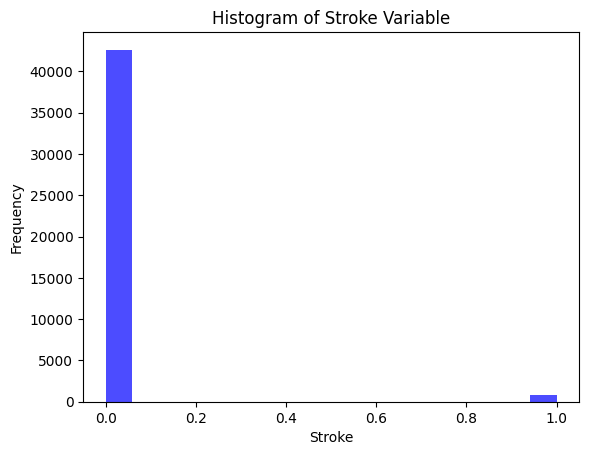

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting the histogram
plt.hist(df['stroke'], bins='auto', color='blue', alpha=0.7)
plt.title('Histogram of Stroke Variable')
plt.xlabel('Stroke')
plt.ylabel('Frequency')
plt.show()

## **Interpretasi :**

Data pada variabel target 'stroke' menunjukkan ketidakseimbangan (imbalanced data), di mana terdapat 42.617 data pada kategori 0 (tidak mengalami stroke) dan hanya 783 data pada kategori 1 (mengalami stroke). Hal ini menunjukkan bahwa proporsi antara kedua kategori tersebut tidak seimbang, dengan jumlah data pada kategori 0 jauh lebih besar dibandingkan dengan kategori 1.

### Quantitative Features

In [8]:
num_col = df.select_dtypes(include='number').columns.to_list()
num_col

['id',
 'age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'stroke']

# **Exploratory Data Analysis**

### Categorical Comparison

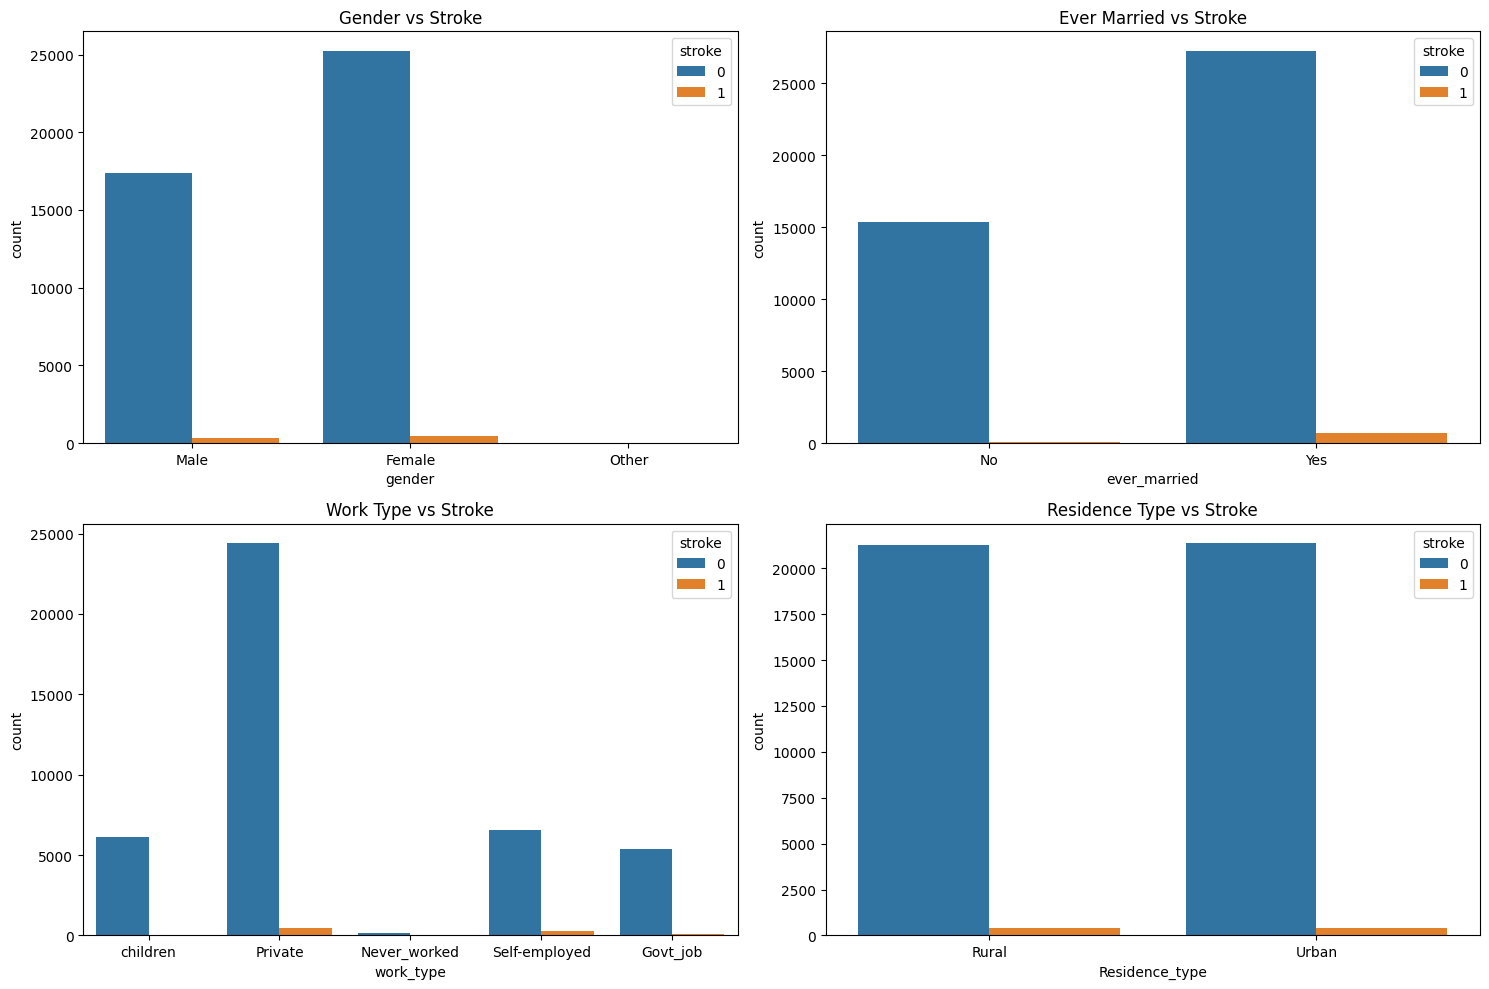

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

sns.countplot(x='gender', hue='stroke', data=df, ax=axs[0, 0])
axs[0, 0].set_title('Gender vs Stroke')

sns.countplot(x='ever_married', hue='stroke', data=df, ax=axs[0, 1])
axs[0, 1].set_title('Ever Married vs Stroke')

sns.countplot(x='work_type', hue='stroke', data=df, ax=axs[1, 0])
axs[1, 0].set_title('Work Type vs Stroke')

sns.countplot(x='Residence_type', hue='stroke', data=df, ax=axs[1, 1])
axs[1, 1].set_title('Residence Type vs Stroke')

plt.tight_layout()
plt.show()


### Outlier

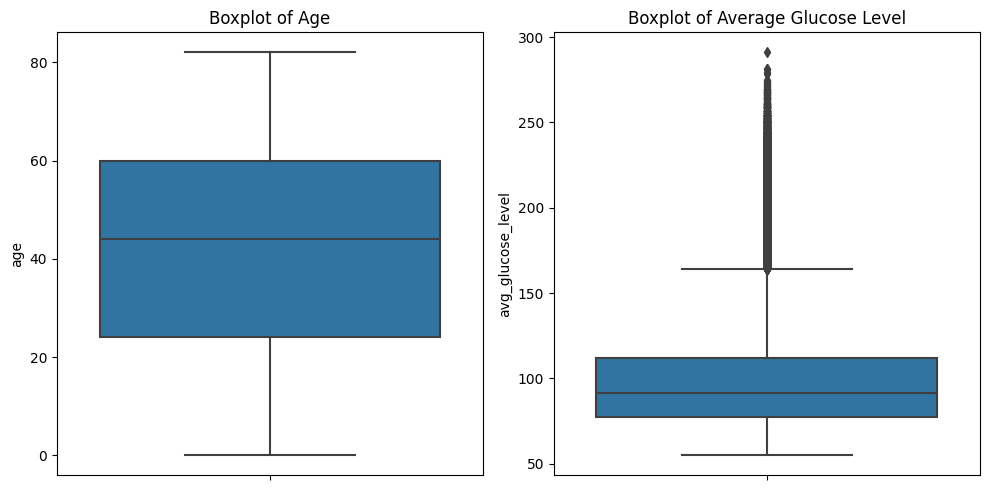

In [10]:
df_num = df[['age', 'avg_glucose_level']]

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_num['age'])
plt.title('Boxplot of Age')

plt.subplot(1, 2, 2)
sns.boxplot(y=df_num['avg_glucose_level'])
plt.title('Boxplot of Average Glucose Level')

plt.tight_layout()
plt.show()

## **Interpretasi:**    

Dari gambaran boxplot, terlihat bahwa terdapat outlier pada variabel 'Average Glucose Level'. Meskipun outlier tersebut terdeteksi, kami memutuskan untuk tidak menghapusnya. Keputusan ini diambil karena jumlah outlier yang terlalu banyak, dan kami khawatir bahwa penghapusan outlier tersebut dapat mengurangi informasi yang penting dan mempengaruhi akurasi analisis data.

# **Data Preprocessing**

### Drop Variables

In [11]:
df_new = df.drop(['id', 'bmi', 'smoking_status'], axis=1)
df_new.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,0
2,Female,8.0,0,0,No,Private,Urban,110.89,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,0


## **Interpretasi :**  

Kami menghapus variabel 'id' karena kurangnya relevansinya dengan variabel 'stroke', dan membuang 'bmi' serta 'smoking_status' akibat mengingat jumlah nilai yang hilang pada variabel-variabel tersebut yang sangat tinggi, sehingga berpotensi mengurangi keakuratan dan keandalan dari hasil analisis

### Dummy Variable Creation

In [12]:
df_dummy = df_new.copy()

df_dummy = pd.get_dummies(df_dummy, drop_first=True)
df_dummy.head()

,age,hypertension,heart_disease,avg_glucose_level,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban
0,3.0,0,0,95.12,0,True,False,False,False,False,False,True,False
1,58.0,1,0,87.96,0,True,False,True,False,True,False,False,True
2,8.0,0,0,110.89,0,False,False,False,False,True,False,False,True
3,70.0,0,0,69.04,0,False,False,True,False,True,False,False,False
4,14.0,0,0,161.28,0,True,False,False,True,False,False,False,False


## **Over Sampling**

#### Handling Imbalanced Data

In [13]:
X = df_dummy
y = df_dummy['stroke']
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

df_resampled_smote = pd.DataFrame(X_resampled, columns=df.drop('stroke', axis=1).columns)
df_resampled_smote['stroke'] = y_resampled

In [14]:
print(df_resampled_smote['stroke'].value_counts())

stroke
0    42617
1    42617
Name: count, dtype: int64


## **Interpretasi:**

Setelah melakukan oversampling pada data, kami memiliki jumlah yang sama dari dua kategori 'stroke', yaitu 42.617 untuk masing-masing kategori.

#### Spilt Data for Over Sampling

In [15]:
from sklearn.model_selection import train_test_split

def train_test_split(df_resampled_smote):
    from sklearn.model_selection import train_test_split
    train_data, test_data = train_test_split(df_resampled_smote, test_size=0.3, random_state=42, stratify=df_resampled_smote['stroke'])
    return train_data, test_data

train_data, test_data = train_test_split(df_resampled_smote)


#### Evaluate Best Model

In [16]:
from pycaret.classification import setup, compare_models, evaluate_model


def model_training(train_data):

    s_train = setup(data=train_data, target="stroke")
    best_model_train = compare_models()

    evaluate_model(best_model_train)

    return best_model_train

best_model_train = model_training(train_data)


,Description,Value
0,Session id,476
1,Target,stroke
2,Target type,Binary
3,Original data shape,"(59663, 12)"
4,Transformed data shape,"(59663, 5)"
5,Transformed train set shape,"(41764, 5)"
6,Transformed test set shape,"(17899, 5)"
7,Numeric features,11
8,Rows with missing values,100.0%
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9483,0.0000,0.9490,0.9477,0.9483,0.8966,0.8966,0.0610
rf,Random Forest Classifier,0.9446,0.0000,0.9417,0.9471,0.9444,0.8891,0.8892,1.3020
et,Extra Trees Classifier,0.9409,0.0000,0.9429,0.9391,0.9410,0.8817,0.8817,0.4880
lightgbm,Light Gradient Boosting Machine,0.9237,0.0000,0.9239,0.9237,0.9237,0.8474,0.8475,0.2050
knn,K Neighbors Classifier,0.8743,0.0000,0.9331,0.8350,0.8813,0.7486,0.7539,0.0820
gbc,Gradient Boosting Classifier,0.8202,0.0000,0.8627,0.7952,0.8275,0.6404,0.6428,1.0890
ada,Ada Boost Classifier,0.7904,0.0000,0.8481,0.7604,0.8018,0.5807,0.5847,0.3250
ridge,Ridge Classifier,0.7833,0.0000,0.8505,0.7498,0.7969,0.5666,0.5718,0.0490
lda,Linear Discriminant Analysis,0.7833,0.0000,0.8505,0.7498,0.7970,0.5666,0.5718,0.0420
lr,Logistic Regression,0.7825,0.0000,0.8183,0.7638,0.7900,0.5651,0.5666,0.6980


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

#### Model Prediction

In [17]:
from pycaret.classification import predict_model

def model_prediction(model, test_data):

    predictions = predict_model(model, data=test_data)
    return predictions[['stroke', 'prediction_label', 'prediction_score']]

predictions_test = model_prediction(best_model_train, test_data)

print("Predictions on Test Data:")
print(predictions_test)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9497,0.9498,0.9510,0.9487,0.9498,0.8995,0.8995


Predictions on Test Data:
       stroke  prediction_label  prediction_score
30577       0                 0               1.0
39783       0                 0               1.0
10391       0                 0               1.0
45268       1                 1               1.0
54918       1                 1               1.0
...       ...               ...               ...
16874       0                 0               1.0
52974       1                 1               1.0
32292       0                 1               1.0
70286       1                 1               1.0
14650       0                 0               1.0

[25571 rows x 3 columns]


## **Interpretasi:**    

Model Decision Tree Classifier dengan oversampling SMOTE memberikan tingkat akurasi sekitar 94%. Prediksi model pada data tes menunjukkan bahwa semua kasus memiliki skor prediksi 1.0, menunjukkan keberhasilan model dalam memprediksi risiko stroke.

## **Under Sampling**

#### Handling Imbalanced Data

In [18]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler

X = df_dummy.drop('stroke', axis=1)
y = df_dummy['stroke']

rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)

print(pd.Series(y_resampled).value_counts())

stroke
0    783
1    783
Name: count, dtype: int64


#### Spilt Data

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)


#### Evaluate Best Model

In [20]:
from pycaret.classification import setup, compare_models, evaluate_model

s_train = setup(data=pd.concat([X_train, y_train], axis=1), target="stroke")
best_model_train = compare_models()

evaluate_model(best_model_train)


,Description,Value
0,Session id,8259
1,Target,stroke
2,Target type,Binary
3,Original data shape,"(1096, 13)"
4,Transformed data shape,"(1096, 13)"
5,Transformed train set shape,"(767, 13)"
6,Transformed test set shape,"(329, 13)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7808,0.8546,0.8252,0.7597,0.7907,0.5616,0.5642,0.0430
ada,Ada Boost Classifier,0.7769,0.8397,0.8147,0.7580,0.7840,0.5538,0.5577,0.0480
knn,K Neighbors Classifier,0.7756,0.8152,0.8227,0.7557,0.7866,0.5514,0.5555,0.0300
ridge,Ridge Classifier,0.7742,0.0000,0.8302,0.7482,0.7867,0.5485,0.5525,0.0140
lda,Linear Discriminant Analysis,0.7729,0.8536,0.8277,0.7478,0.7852,0.5459,0.5496,0.0150
gbc,Gradient Boosting Classifier,0.7599,0.8240,0.7887,0.7463,0.7663,0.5198,0.5215,0.0750
lightgbm,Light Gradient Boosting Machine,0.7573,0.8112,0.7940,0.7431,0.7661,0.5147,0.5185,0.1200
rf,Random Forest Classifier,0.7559,0.8117,0.7965,0.7407,0.7660,0.5119,0.5156,0.0850
et,Extra Trees Classifier,0.7273,0.7983,0.7420,0.7245,0.7312,0.4548,0.4573,0.0640
dt,Decision Tree Classifier,0.6934,0.6935,0.6764,0.7010,0.6876,0.3868,0.3880,0.0170


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

#### Handling Imbalanced Data

In [21]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from pycaret.classification import setup, compare_models, save_model
import pandas as pd

X = df_dummy.drop('stroke', axis=1)
y = df_dummy['stroke']

rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)


print(pd.Series(y_resampled).value_counts())

stroke
0    783
1    783
Name: count, dtype: int64


## **Interpretasi:**

Setelah melakukan undersampling pada data, kami memiliki jumlah yang sama dari dua kategori 'stroke', yaitu 783 untuk masing-masing kategori.

#### Split Data

In [22]:
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

df_train = pd.concat([X_train, y_train], axis=1)


#### Evaluate Best Model

In [27]:
from pycaret.classification import setup, compare_models, pull
import pandas as pd


s = setup(data=df_resampled, target='stroke', verbose=False, session_id=42)

best_model = compare_models()

results = pull()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.7810,0.0000,0.8267,0.7584,0.7902,0.5620,0.5657,0.0200
lda,Linear Discriminant Analysis,0.7801,0.8551,0.8248,0.7580,0.7892,0.5602,0.5638,0.0160
lr,Logistic Regression,0.7792,0.8552,0.8158,0.7615,0.7868,0.5583,0.5612,0.0370
gbc,Gradient Boosting Classifier,0.7765,0.8404,0.8084,0.7606,0.7829,0.5529,0.5553,0.0840
knn,K Neighbors Classifier,0.7746,0.8117,0.8121,0.7565,0.7828,0.5492,0.5516,0.0300
ada,Ada Boost Classifier,0.7683,0.8322,0.8194,0.7456,0.7794,0.5366,0.5416,0.0570
lightgbm,Light Gradient Boosting Machine,0.7555,0.8301,0.7757,0.7455,0.7596,0.5110,0.5125,0.1220
rf,Random Forest Classifier,0.7509,0.8166,0.7810,0.7366,0.7576,0.5018,0.5036,0.0850
et,Extra Trees Classifier,0.7208,0.7997,0.7334,0.7155,0.7239,0.4415,0.4423,0.0820
dt,Decision Tree Classifier,0.7053,0.7054,0.6989,0.7083,0.7026,0.4107,0.4117,0.0160


#### Prediction Model

In [59]:
from pycaret.classification import load_model, predict_model
import pandas as pd

test_data = pd.concat([X_test, y_test], axis=1)

test_data['predicted_label'] = predictions['prediction_label']
test_data['predicted_score'] = predictions['prediction_score']

print("Predictions on Test Data:")
print(test_data[['stroke', 'predicted_label', 'predicted_score']].head())


Predictions on Test Data:
       stroke  predicted_label  predicted_score
2654        1              0.0             0.78
1815        0              NaN              NaN
12587       0              NaN              NaN
22549       1              NaN              NaN
415         0              NaN              NaN


## **Interpretasi**:
Berdasarkan hasil evaluasi, perbedaan antara hasil akurasi pada evaluasi model dan prediksi model bisa disebabkan oleh variasi dalam ketidakseimbangan kelas antara data evaluasi dan data uji. Evaluasi model dilakukan dengan menggunakan teknik validasi silang di mana dataset dibagi secara merata, sementara data uji mungkin memiliki distribusi kelas yang berbeda. Oleh karena itu, model mungkin memiliki kinerja yang berbeda saat dihadapkan pada distribusi kelas yang tidak seimbang, yang dapat menyebabkan perbedaan dalam hasil akurasi antara evaluasi model dan prediksi model.

## **Hybrid (Smote-Tomek)**

#### Handling Imbalanced Data

In [29]:
import pandas as pd
from imblearn.combine import SMOTETomek

X = df_dummy
y = df_dummy['stroke']

smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

df_resampled_smote_tomek = pd.DataFrame(X_resampled, columns=df.drop('stroke', axis=1).columns)
df_resampled_smote_tomek['stroke'] = y_resampled

In [30]:
print(df_resampled_smote_tomek['stroke'].value_counts())

stroke
0    42610
1    42610
Name: count, dtype: int64


## **Interpretasi:**

Setelah melakukan 'smote-tomek' pada data, kami memiliki jumlah yang sama dari dua kategori 'stroke', yaitu 42.610 untuk masing-masing kategori.

#### Split Data

In [31]:
def train_test_split(df_resampled_smote_tomek):
    from sklearn.model_selection import train_test_split
    train_data, test_data = train_test_split(df_resampled_smote_tomek, test_size=0.3, random_state=42, stratify=df_resampled_smote_tomek['stroke'])
    return train_data, test_data

ST_train, ST_test = train_test_split(df_resampled_smote_tomek)

#### Evaluate Best Model for Smote-Tomek

In [32]:
ST_train = setup(data=ST_train, target="stroke")
best_model_train = compare_models()

evaluate_model(best_model_train)

,Description,Value
0,Session id,3392
1,Target,stroke
2,Target type,Binary
3,Original data shape,"(59654, 12)"
4,Transformed data shape,"(59654, 5)"
5,Transformed train set shape,"(41757, 5)"
6,Transformed test set shape,"(17897, 5)"
7,Numeric features,11
8,Rows with missing values,100.0%
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9467,0.0000,0.9477,0.9459,0.9468,0.8935,0.8935,0.0720
rf,Random Forest Classifier,0.9437,0.0000,0.9415,0.9456,0.9435,0.8873,0.8873,1.1650
et,Extra Trees Classifier,0.9411,0.0000,0.9427,0.9398,0.9412,0.8823,0.8823,0.5440
lightgbm,Light Gradient Boosting Machine,0.9265,0.0000,0.9318,0.9221,0.9269,0.8531,0.8532,0.3310
knn,K Neighbors Classifier,0.8749,0.0000,0.9334,0.8358,0.8819,0.7499,0.7551,0.0870
gbc,Gradient Boosting Classifier,0.8184,0.0000,0.8610,0.7935,0.8258,0.6369,0.6392,1.0230
ada,Ada Boost Classifier,0.7892,0.0000,0.8481,0.7587,0.8009,0.5784,0.5825,0.3750
lda,Linear Discriminant Analysis,0.7818,0.0000,0.8475,0.7490,0.7952,0.5635,0.5685,0.0390
ridge,Ridge Classifier,0.7817,0.0000,0.8474,0.7490,0.7952,0.5635,0.5684,0.0400
lr,Logistic Regression,0.7795,0.0000,0.8131,0.7619,0.7867,0.5590,0.5603,0.0850


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

#### Prediction Model

In [33]:
from pycaret.classification import predict_model

predictions = predict_model(best_model_train, data=ST_test)
predictions = predictions[['stroke', 'prediction_label', 'prediction_score']]
print("Predictions:")
print(predictions)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9469,0.9469,0.9437,0.9498,0.9467,0.8938,0.8938


Predictions:
       stroke  prediction_label  prediction_score
75591       1                 1               1.0
42768       0                 0               1.0
85181       1                 1               1.0
4725        0                 1               1.0
70692       1                 1               1.0
...       ...               ...               ...
18750       0                 0               1.0
13914       0                 0               1.0
16519       0                 0               1.0
47900       1                 1               1.0
13004       0                 0               1.0

[25566 rows x 3 columns]


## **Interpretasi:**    

Dilihat dari evaluasi model dan prediksi model dapat diketahui bahwa hasil hybrid SMOTE-TOMEK didapatkan bahwa tingkat akurasi terbaiknya yaitu 94% untuk model Decision Tree Classifier

## **Hybrid (Smote-ENN)**

#### Handling Imbalanced Data

In [34]:
import pandas as pd
from imblearn.combine import SMOTEENN

X = df_dummy
y = df_dummy['stroke']

smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

df_resampled_smote_enn = pd.DataFrame(X_resampled, columns=df.drop('stroke', axis=1).columns)
df_resampled_smote_enn['stroke'] = y_resampled

In [35]:
print(df_resampled_smote_enn['stroke'].value_counts())

stroke
1    42298
0    40189
Name: count, dtype: int64


## **Interpretasi:**

Setelah melakukan 'smote-enn' pada data, kami memiliki jumlah yang lebih balance dari dua kategori 'stroke', yaitu untuk kategori 1 yaitu 42298 dan untuk kategori 0 yaitu 40189

#### Split Data

In [36]:
import pandas as pd
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split


def train_test_split_data(df_resampled_smote_enn):
    train_data, test_data = train_test_split(df_resampled_smote_enn, test_size=0.3, random_state=42, stratify=df_resampled_smote_enn['stroke'])
    return train_data, test_data

SE_train, SE_test = train_test_split(df_resampled_smote_enn)


#### Evaluate  Best Model

In [37]:
s_train = setup(data=SE_train, target="stroke")
best_model_train = compare_models()

evaluate_model(best_model_train)


,Description,Value
0,Session id,424
1,Target,stroke
2,Target type,Binary
3,Original data shape,"(61865, 12)"
4,Transformed data shape,"(61865, 5)"
5,Transformed train set shape,"(43305, 5)"
6,Transformed test set shape,"(18560, 5)"
7,Numeric features,11
8,Rows with missing values,100.0%
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9543,0.0000,0.9583,0.9530,0.9556,0.9085,0.9085,0.4480
rf,Random Forest Classifier,0.9538,0.0000,0.9550,0.9551,0.9550,0.9075,0.9075,1.0840
dt,Decision Tree Classifier,0.9523,0.0000,0.9539,0.9534,0.9536,0.9046,0.9046,0.0740
lightgbm,Light Gradient Boosting Machine,0.9326,0.0000,0.9429,0.9272,0.9350,0.8650,0.8652,0.2080
knn,K Neighbors Classifier,0.9002,0.0000,0.9496,0.8686,0.9073,0.7998,0.8036,0.0900
gbc,Gradient Boosting Classifier,0.8384,0.0000,0.8800,0.8191,0.8484,0.6758,0.6779,1.0170
ada,Ada Boost Classifier,0.8096,0.0000,0.8818,0.7776,0.8264,0.6173,0.6235,0.3680
ridge,Ridge Classifier,0.7986,0.0000,0.8694,0.7690,0.8161,0.5954,0.6009,0.0360
lda,Linear Discriminant Analysis,0.7986,0.0000,0.8694,0.7690,0.8161,0.5954,0.6009,0.0360
lr,Logistic Regression,0.7972,0.0000,0.8372,0.7832,0.8092,0.5932,0.5947,0.0890


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

#### Prediction Model

In [38]:
from pycaret.classification import predict_model

predictions = predict_model(best_model_train, data=SE_test)
predictions = predictions[[ 'stroke', 'prediction_label', 'prediction_score']]
print("Predictions:")
print(predictions)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9576,0.9843,0.9621,0.9549,0.9585,0.9151,0.9151


Predictions:
       stroke  prediction_label  prediction_score
37229       0                 0              1.00
11633       0                 0              0.99
56753       1                 1              1.00
15937       0                 0              0.82
62071       1                 1              0.95
...       ...               ...               ...
52910       1                 1              0.92
75833       1                 1              0.99
36861       0                 0              1.00
72738       1                 1              0.77
23346       0                 0              0.99

[20622 rows x 3 columns]


## **Interpretasi:**    

Dilihat dari evaluasi model dan prediksi model dapat diketahui bahwa hasil hybrid SMOTE-ENN didapatkan bahwa tingkat akurasi terbaiknya yaitu 95% untuk model Decision Tree Classifier

# **Kesimpulan:**
Model dengan tingkat akurasi tertinggi adalah model yang menggunakan teknik hybrid SMOTE-ENN, dengan tingkat akurasi sebesar 95% untuk Decision Tree Classifier. Oleh karena itu, dari empat opsi teknik  yang disediakan, model ini dianggap paling baik dalam hal kinerja prediktif untuk dataset yang diberikan.